<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

© Copyright Quantopian Inc.<br>
© Modifications Copyright QuantRocket LLC<br>
Licensed under the [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/legalcode).

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Principal Component Analysis

by Rene Zhang and Max Margenot

Applications in many fields, such as image processing, bioinformatics, and quantitative finance, involve large-scale data. Both the size and complexity of this data can make the computations required for analysis practically infeasible. Principal Component Analysis (PCA) is a classical method for dimension reduction. It uses the first several **principal components**, statistical features that explain most of the variation of a $m \times n$ data matrix $\mathbf{X}$, to describe the large-scale data matrix $\mathbf{X}$ economically.   

In [1]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will introduce PCA with an image processing example. A grayscale digital image can be represented by a matrix, whose $(i,j)^{th}$ entry corresponds to the measurement of gray
scale at the $(i,j)^{th}$ pixel. The following gray-scale image has $200 \times 200$ pixels, though it can be changed on the fly. We store it in a matrix $\mathbf{X}$. The number of rows of the  $\mathbf{X}$ is $200$, and the number of columns of $\mathbf{X}$ is $200$.

In [2]:
def generate_test_image(m,n):
    X = np.zeros((m,n))
# generate a rectangle
    X[25:80,25:80] = 1
# generate a triangle
    for i in range(25, 80, 1):
        X[i+80:160, 100+i-1] = 2
# generate a circle
    for i in range(0,200,1):
        for j in range(0,200,1):
            if ((i - 135)*(i - 135) +(j - 53)*(j - 53) <= 900):
                X[i, j] = 3
    return X
X = generate_test_image(200,200)

We start with a simple checkboard pattern, add some random normal noise, and add a gradient.

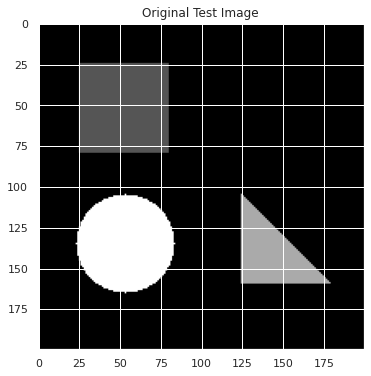

In [3]:
imgplot = plt.imshow(X, cmap='gray')
plt.title('Original Test Image');

In [4]:
m = X.shape[0] # num of rows
n = X.shape[1] # num of columns

Set each row as a variable, with observations in the columns. Denote the covariance matrix of $\mathbf{X}$ as $\mathbf{C}$, where the size of $\mathbf{C}$ is $m \times m$. $\mathbf{C}$ is a matrix whose $(i,j)^{th}$ entry is the covariance between the $i^{th}$ row and $j^{th}$ row of the matrix $\mathbf{X}$.

In [5]:
X = np.asarray(X, dtype=np.float64)
C = np.cov(X)

In [6]:
np.linalg.matrix_rank(C)

62

Performing principal component analysis decomposes the matrix $\mathbf{C}$ into:

$$\mathbf{C} = \mathbf{L}\mathbf{P}\mathbf{L}^{\top},$$

where $\mathbf{P}$ is a diagonal matrix $\mathbf{P}=\text{diag}(\lambda_1,\lambda_2,\dots,\lambda_m)$, with $\lambda_1 \geq \lambda_1 \geq \dots \lambda_m \geq 0$ being the eigenvalues of matrix $\mathbf{C}$. The matrix $\mathbf{L}$ is an orthogonal matrix, consisting the eigenvectors of matrix $\mathbf{C}$.

In [7]:
P, L = LA.eigh(C)

The function `LA.eigh` lists the eigenvalues from small to large in $P$. Let us change the order first to list them from largest to smallest and make sure that $\mathbf{L}\mathbf{P}\mathbf{L}^{\top}==\mathbf{C}$. 

In [8]:
P = P[::-1]
L = L[:,::-1]

In [9]:
np.allclose(L.dot(np.diag(P)).dot(L.T), C)

True

Here we plot all of the eigenvalues:

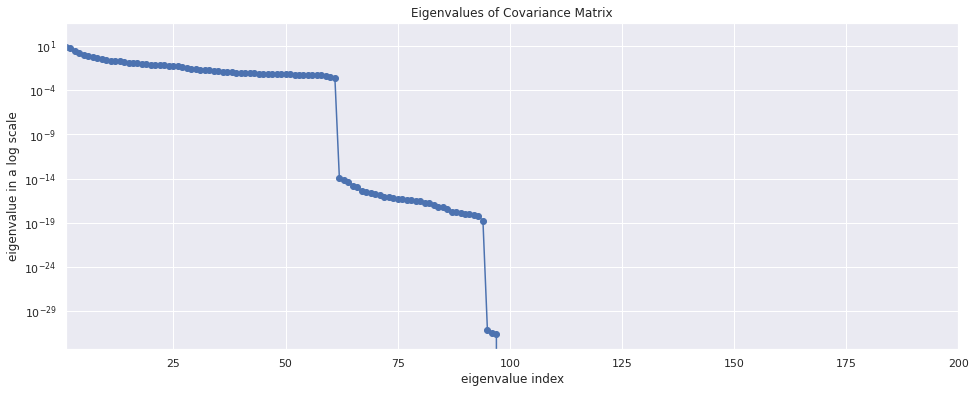

In [10]:
plt.semilogy(P, '-o')
plt.xlim([1, P.shape[0]])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue in a log scale')
plt.title('Eigenvalues of Covariance Matrix');

The $i^{th}$ **principal component** is given as $i^{th}$ row of $\mathbf{V}$, 

 $$\mathbf{V} =\mathbf{L}^{\top} \mathbf{X}.$$


In [11]:
V = L.T.dot(X)

In [12]:
V.shape

(200, 200)

If we multiply both sides on the left by $\mathbf{L}$, we get the following:

 $$\mathbf{L}\mathbf{L}^{\top} \mathbf{X}= \mathbf{L}\mathbf{V}.$$

The matrix $\mathbf{L}$ is the set of eigenvectors from a covariance matrix , so $\mathbf{L}\mathbf{L}^{\top} = \mathbf{I}$ and $\mathbf{L}\mathbf{L}^{\top}\mathbf{X} = \mathbf{X}$. The relationship among matrices of $\mathbf{X}$, $\mathbf{L}$, and $\mathbf{V}$ can be expressed as
 
$$\mathbf{X} = \mathbf{L}\mathbf{V}.$$


To approximate $\mathbf{X}$, we use $k$ eigenvectors that have largest eigenvalues:

$$\mathbf{X} \approx \mathbf{L[:, 1:k]}\mathbf{L[:, 1:k]}^{\top} \mathbf{X}.$$

Denote the approximated $\mathbf{X}$ as $\tilde{\mathbf{X}} = \mathbf{L[:, 1:k]}\mathbf{L[:, 1:k]}^{\top} \mathbf{X}$. When $k = m $, the $\tilde{\mathbf{X}}$ should be same as $\mathbf{X}$.

In [13]:
k = 200
X_tilde =  L[:,0:k-1].dot(L[:,0:k-1].T).dot(X)

In [14]:
np.allclose(X_tilde, X)

True

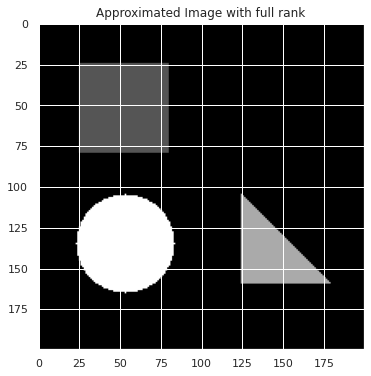

In [15]:
plt.imshow(X_tilde, cmap='gray')
plt.title('Approximated Image with full rank');

The proportion of total variance due to the $i^{th}$ principal component is given by the ratio $\frac{\lambda_i}{\lambda_1 + \lambda_2 + \dots \lambda_m}.$ The sum of proportion of total variance should be $1$. As we defined, $\lambda_i$ is $i^{th}$ entry of $\mathbf{P}$, 

$$\sum_{i}\frac{P_i}{\text{trace}(P)} = 1$$

Where the trace$(P)$ is the sum of the diagonal of $P$.

In [16]:
(P/P.sum()).sum()

1.0000000000000002

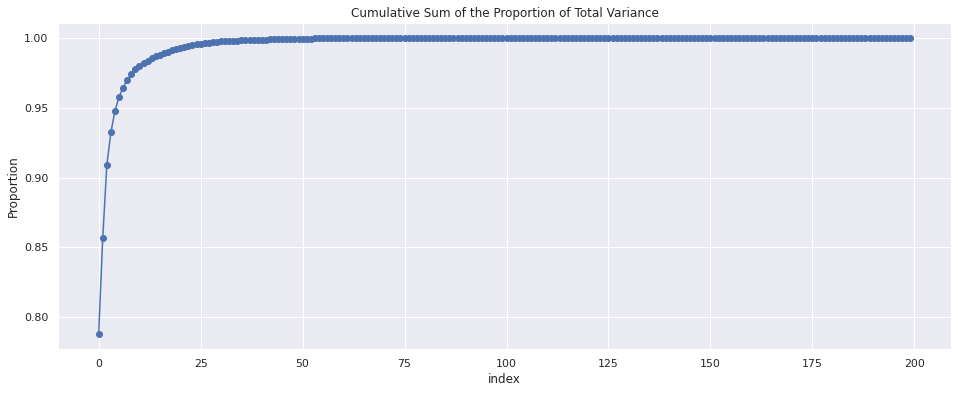

In [17]:
plt.plot((P/P.sum()).cumsum(), '-o')
plt.title('Cumulative Sum of the Proportion of Total Variance')
plt.xlabel('index')
plt.ylabel('Proportion');

Recall the number of principal components is denoted as $k$. Let $k$ be $10, 20, 30, 60$ as examples and take a look at the corresponding approximated images.

In [18]:
X_tilde_10 = L[:,0:10-1].dot(V[0:10-1,:])
X_tilde_20 = L[:,0:20-1].dot(V[0:20-1,:])
X_tilde_30 = L[:,0:30-1].dot(V[0:30-1,:])
X_tilde_60 = L[:,0:60-1].dot(V[0:60-1,:])

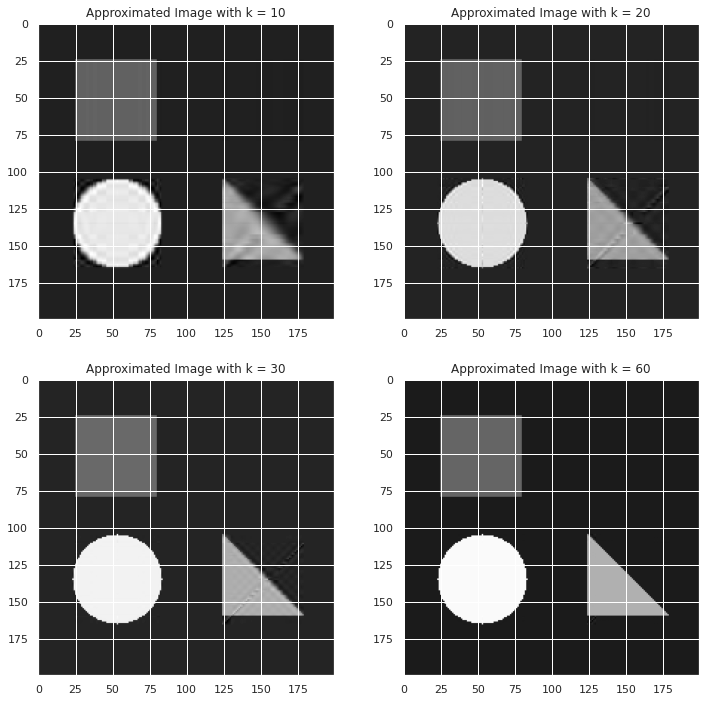

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
ax1.imshow(X_tilde_10, cmap='gray')
ax1.set(title='Approximated Image with k = 10')
ax2.imshow(X_tilde_20, cmap='gray')
ax2.set(title='Approximated Image with k = 20')
ax3.imshow(X_tilde_30, cmap='gray')
ax3.set(title='Approximated Image with k = 30')
ax4.imshow(X_tilde_60, cmap='gray')
ax4.set(title='Approximated Image with k = 60');

The number of variables in $X$ is $200$. When reducing the dimension to $k=60$, which uses half of the principal components, the approximated image is close to the original one.

Moving forward, we do not have to do PCA by hand. Luckly, [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) has an implementation that we can use. Next, let us show an example in quantitative finance using sklearn.

## PCA on a Portfolio

Construct a portfolio with 10 stocks, IBM, MSFT, FB, T, INTC, ABX, NEM, AU, AEM, GFI. 5 of them are technology related and 5 of them are gold mining companies.

In this case, there are 10 variables (companies), and each column is a variable.

In [20]:
from quantrocket.master import get_securities
from quantrocket import get_prices

# NOTE: GOLD returns two stocks, Randgold and Barrick, both of which
# have used the symbol GOLD. This illustrates why using Sids is better
# than using symbols
symbols = ['IBM','MSFT', 'FB', 'T', 'INTC', 'GOLD', 'NEM', 'AU', 'AEM']

securities = get_securities(symbols=symbols, vendors='usstock')


start = "2015-09-01"
end = "2016-11-01"

portfolio_returns = get_prices(
    'usstock-1min',
    data_frequency='daily',
    sids=securities.index.tolist(), 
    start_date=start, 
    end_date=end, 
    fields="Close").loc['Close'].pct_change()[1:]

sids_to_symbols = securities.Symbol.to_dict()
portfolio_returns = portfolio_returns.rename(columns=sids_to_symbols)

In [21]:
from sklearn.decomposition import PCA
num_pc = 2

X = np.asarray(portfolio_returns)
[n,m] = X.shape
print('The number of timestamps is {}.'.format(n))
print('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 2 PCs'.format(percentage_cum[-1]*100))

pca_components = pca.components_

The number of timestamps is 295.
The number of stocks is 10.
80.01% of the variance is explained by the first 2 PCs


Notice that the grand bulk of the variance of the returns of these assets can be explained by the first two principal components.

Now we collect the first two principal components and plot their contributions.

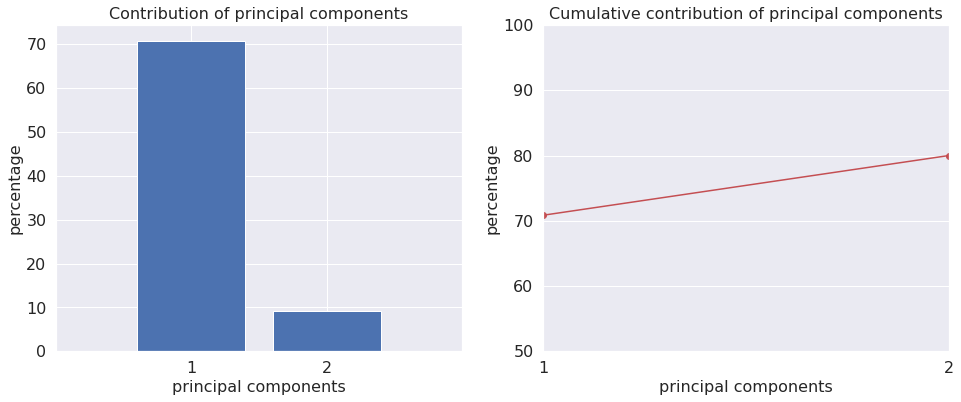

In [22]:
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100]);

From these principal components we can construct "statistical risk factors", similar to more conventional common risk factors. These should give us an idea of how much of the portfolio's returns comes from some unobservable statistical feature.

In [23]:
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=portfolio_returns.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2
Date,,
2015-09-02,-0.027190,0.054428
2015-09-03,-0.030120,0.005510
2015-09-04,-0.031055,-0.032785
2015-09-08,0.026348,0.051130
2015-09-09,-0.072520,-0.015322


The factor returns here are an analogue to the principal component matrix $\mathbf{V}$ in the image processing example. 

In [24]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=portfolio_returns.columns,
                                data = pca.components_).T

In [25]:
factor_exposures

,factor 1,factor 2
Sid,,
AEM,0.409202,0.036280
AU,0.526910,-0.036039
FB,-0.013740,0.552167
GOLD,0.345780,0.044879
GOLD,0.514167,-0.107536
IBM,0.012374,0.359402
INTC,-0.007223,0.463317
MSFT,-0.015200,0.534353
NEM,0.411430,0.127619


The factor exposures are an analogue to the eigenvector matrix $\mathbf{L}$ in the image processing example.

In [26]:
labels = factor_exposures.index
data = factor_exposures.values

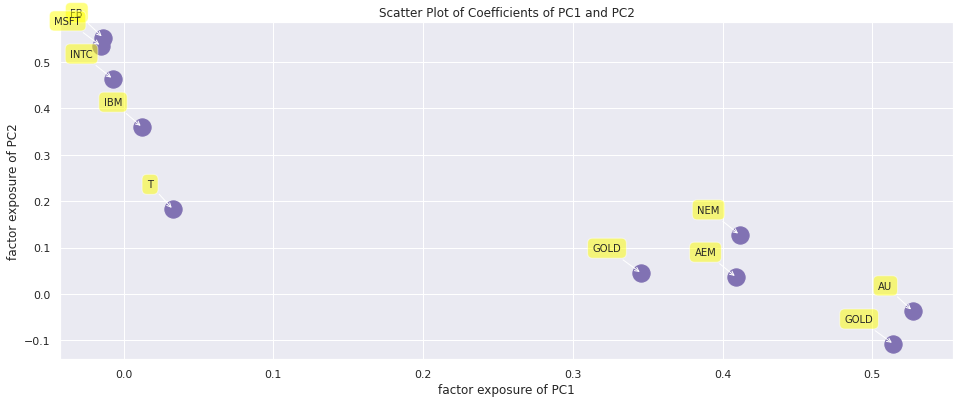

In [27]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );

Creating statistical risk factors allows us to further break down the returns of a portfolio to get a better idea of the risk. This can be used as an additional step after performance attribution with more common risk factors to try to account for additional unknown risks.


## References:
- Datta, B.N., 2010. *Numerical linear algebra and applications*. Siam.
- Qian, E.E., Hua, R.H. and Sorensen, E.H., 2007. *Quantitative equity portfolio management: modern techniques and applications*. CRC Press.

---

**Next Lecture:** [Long-Short Equity](Lecture37-Long-Short-Equity.ipynb)

[Back to Introduction](Introduction.ipynb) 

---

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian") or QuantRocket LLC ("QuantRocket"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, neither Quantopian nor QuantRocket has taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information believed to be reliable at the time of publication. Neither Quantopian nor QuantRocket makes any guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*